In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fastbook
from fastbook import *
import os

In [10]:
from pathlib import *
from fastai.vision.widgets import *

In [11]:
path = Path('/kaggle/input/bears-fastai-2021/bears') # publicly available dataset on kaggle

In [12]:
# get and remove corrputed images
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)


(#0) []

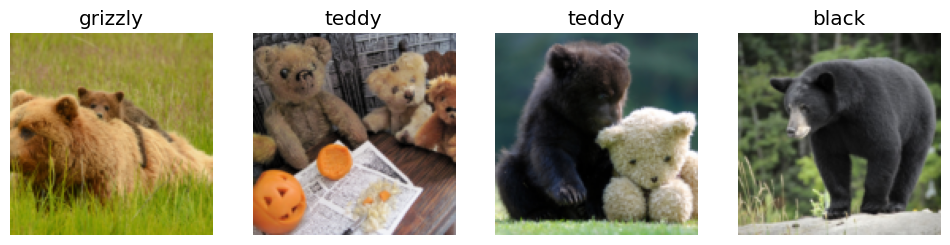

In [13]:
# create a data loader containing training and validation sets
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dls = bears.dataloaders(path) # dataloaders object 

# show samples from validation set 
dls.valid.show_batch(max_n=4, nrows=1)

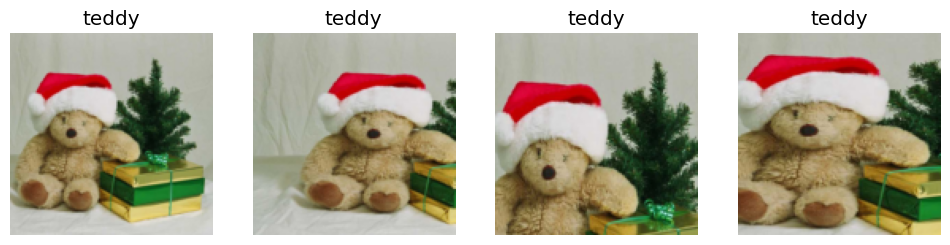

In [15]:
'''
Randomly crop the images on each epoch to train the neural net
to learn the different features of bear. This helps the neural network better recognize what an object is.  
'''

bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)

dls.train.show_batch(max_n=4, nrows=1, unique=True)

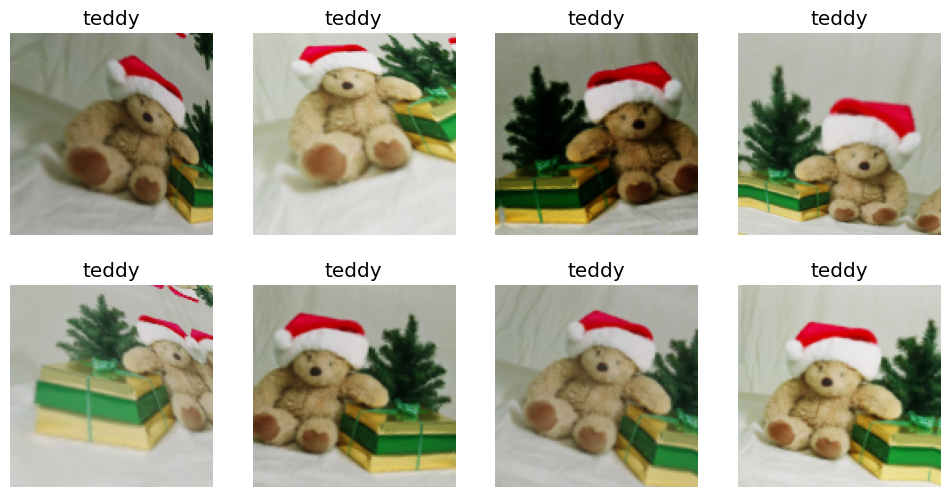

In [16]:
# add more data augmentation to the images 
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)

dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training the Model

In [17]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [18]:
# use a pretained model 
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 74.3MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.351466,0.318730,0.140351,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.303998,0.107197,0.035088,00:18
1,0.227186,0.048882,0.035088,00:18
2,0.164363,0.038114,0.017544,00:18
3,0.126431,0.032565,0.017544,00:19


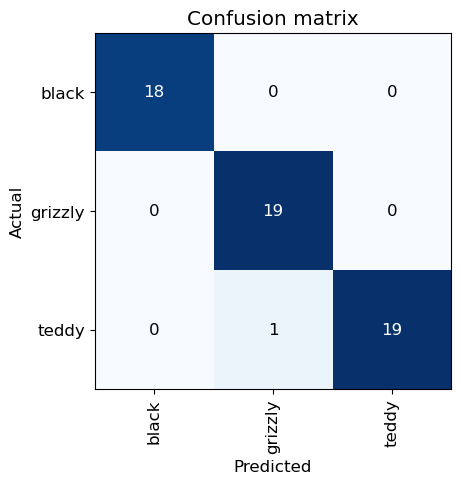

In [21]:
# confusion matrix using validation set 
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

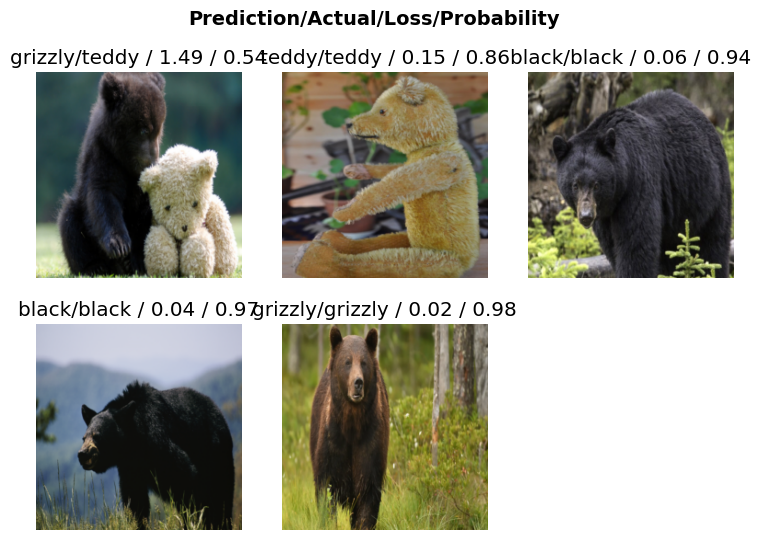

In [23]:
# view the highest losses in the validation set
interp.plot_top_losses(5, nrows=2)

We see that the only error in the model is a picture of containing both a teddy and a what seems to be a black bear.

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [32]:
# download the model
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]